In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
train_df=pd.read_csv('df-train_set.csv')

In [5]:
test_df_1=pd.read_csv('df-test_set.csv')
test_df_1.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [6]:
train_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [9]:
train_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [13]:
train_df.isna().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [7]:
apple_df = train_df.loc[train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS']
apple_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [8]:
apple_df["Date"] = apple_df["Date"].apply(pd.to_datetime)

In [9]:
apple_df.drop('Date1' ,axis=1)

KeyError: "['Date1'] not found in axis"

In [50]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Date1             1952 non-null   datetime64[ns]
dtypes: datetime64[ns](2), f

In [10]:
def to_season(m):
    if 9<= m<= 11:
        return "spring"
    if 1<= m<= 2:
        return "summer"
    if m == 12:
        return "summer"
    if 3<= m<= 5:
        return "autumn"
    if 6<= m<= 8:
        return "winter"


In [11]:
apple_df["Season"] = apple_df["Date"].dt.month.map(to_season)

In [57]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Date1             1952 non-null   datetime64[ns]
 14  season            1952 

In [12]:
apple_df.drop(columns=['season', 'Date1'], inplace=True)
 

KeyError: "['season' 'Date1'] not found in axis"

In [59]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Season            1952 non-null   object        
dtypes: datetime64[ns](1), f

In [13]:
apple_copy = apple_df.copy()

In [14]:
apple_copy.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,spring


In [18]:
apple_df.isna().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
Season              0
dtype: int64

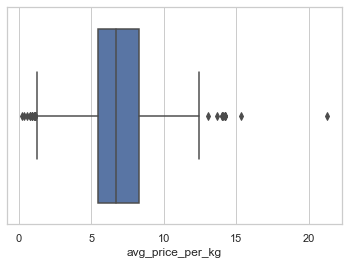

In [19]:
import seaborn as sns

sns.set_theme(style="whitegrid")



ax = sns.boxplot(x='avg_price_per_kg', data=apple_copy)

In [15]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [16]:
ohe.fit_transform(apple_copy[['Province','Container','Size_Grade','Date','Season']])

<1952x179 sparse matrix of type '<class 'numpy.float64'>'
	with 9760 stored elements in Compressed Sparse Row format>

In [17]:
ohe.categories_

[array(['CAPE', 'EASTERN CAPE', 'NATAL', 'ORANGE FREE STATE', 'TRANSVAAL',
        'W.CAPE-BERGRIVER ETC', 'WEST COAST'], dtype=object),
 array(['AC030', 'DT063', 'EC120', 'EF120', 'EG140', 'IA400', 'JE090',
        'JG110', 'M4183', 'M6125', 'M9125'], dtype=object),
 array(['1L', '1M', '1S', '1U', '1X', '2L', '2M', '2S', '2U', '2X'],
       dtype=object),
 array(['2019-12-11T00:00:00.000000000', '2019-12-12T00:00:00.000000000',
        '2019-12-14T00:00:00.000000000', '2019-12-23T00:00:00.000000000',
        '2019-12-30T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
        '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
        '2020-01-06T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
        '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
        '2020-01-11T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
        '2020-01-14T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
        '2020-01-20T00:00:00.000000000', '2020-01

In [18]:
apple_copy_x= apple_copy.drop('avg_price_per_kg', axis=1)

In [19]:
apple_copy.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,spring


In [24]:
pip install lazypredict --user

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pyforest 


Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install lazypredict

In [20]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error# Hide warnings
import warnings
warnings.filterwarnings('ignore')# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

In [27]:
apple_copy_x.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Season
1,CAPE,M4183,1L,18.30,APPLE GOLDEN DELICIOUS,2020-09-09,150.00,170.00,51710.00,332,6075.60,822,spring
7,CAPE,JG110,2M,11.00,APPLE GOLDEN DELICIOUS,2020-04-14,50.00,50.00,16000.00,320,3520.00,0,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.00,APPLE GOLDEN DELICIOUS,2020-04-16,55.00,55.00,990.00,18,162.00,1506,autumn
40,CAPE,M4183,1S,18.30,APPLE GOLDEN DELICIOUS,2020-05-04,80.00,120.00,32020.00,388,7100.40,443,autumn
69,EASTERN CAPE,IA400,1S,400.00,APPLE GOLDEN DELICIOUS,2020-09-28,1800.00,1800.00,1800.00,1,400.00,2,spring


In [28]:
from sklearn.model_selection import train_test_split

In [21]:
# Creating train test split
X = apple_copy.drop(columns=['avg_price_per_kg'])
y = apple_copy['avg_price_per_kg']# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

In [30]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:23<00:00,  1.80it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.90       0.90  0.72        1.46
XGBRegressor                                 0.90       0.90  0.72        1.49
HistGradientBoostingRegressor                0.90       0.90  0.72        4.25
LGBMRegressor                                0.90       0.90  0.73        0.65
RandomForestRegressor                        0.89       0.89  0.76        1.68
GradientBoostingRegressor                    0.88       0.89  0.78        0.71
BaggingRegressor                             0.88       0.88  0.79        0.34
ExtraTreeRegressor                           0.86       0.86  0.86        0.11
MLPRegressor                                 0.85       0.86  0.88        4.97
DecisionTreeRegressor                        0.83       0.83  0.94        0.13
SVR                                          0.79   

In [36]:
extra_tree = ExtraTreesRegressor()
et = extra_tree.fit(X_train,y_train)
et

ValueError: could not convert string to float: 'NATAL'

In [37]:
X_train

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Season
50194,NATAL,AC030,2S,3.00,APPLE GOLDEN DELICIOUS,2020-04-09,10.00,10.00,20.00,2,6.00,8,autumn
50103,EASTERN CAPE,EC120,1S,12.00,APPLE GOLDEN DELICIOUS,2020-03-20,36.00,36.00,3240.00,90,1080.00,0,autumn
31229,CAPE,JE090,2U,9.00,APPLE GOLDEN DELICIOUS,2020-04-07,40.00,50.00,330.00,8,72.00,54,autumn
51283,CAPE,M4183,1S,18.30,APPLE GOLDEN DELICIOUS,2020-04-23,100.00,100.00,2100.00,21,384.30,195,autumn
8648,CAPE,EC120,1S,12.00,APPLE GOLDEN DELICIOUS,2020-06-22,60.00,112.00,23778.00,288,3456.00,1623,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40477,CAPE,JE090,2M,9.00,APPLE GOLDEN DELICIOUS,2020-04-01,40.00,55.00,12300.00,303,2727.00,466,autumn
58127,W.CAPE-BERGRIVER ETC,M4183,1M,18.30,APPLE GOLDEN DELICIOUS,2020-01-16,144.00,144.00,18432.00,128,2342.40,0,summer
48684,W.CAPE-BERGRIVER ETC,EC120,1M,12.00,APPLE GOLDEN DELICIOUS,2020-06-22,120.00,120.00,7680.00,64,768.00,0,winter
58619,EASTERN CAPE,JE090,2M,9.00,APPLE GOLDEN DELICIOUS,2020-01-24,65.00,80.00,11490.00,170,1530.00,190,summer


In [26]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting# Now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [27]:
# Evaluation Functions
def rmse(model, y_test, y_pred, X_train, y_train):
 r_squared = model.score(X_test, y_test)
 mse = mean_squared_error(y_test, y_pred)
 rmse = np.sqrt(mse)
 print('R-squared: ' + str(r_squared))
 print('Mean Squared Error: '+ str(rmse))# Create model line scatter plot

def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for '+ model_name))
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [22]:
#important
df = apple_df.copy()
df.drop(['Commodities','Date'], axis = 1, inplace = True)
df.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.30,150.00,170.00,51710.00,332,6075.60,822,8.51,spring
7,CAPE,JG110,2M,11.00,50.00,50.00,16000.00,320,3520.00,0,4.55,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.00,55.00,55.00,990.00,18,162.00,1506,6.11,autumn
40,CAPE,M4183,1S,18.30,80.00,120.00,32020.00,388,7100.40,443,4.51,autumn
69,EASTERN CAPE,IA400,1S,400.00,1800.00,1800.00,1800.00,1,400.00,2,4.50,spring


In [23]:
nums = pd.get_dummies(df, columns=['Province','Container','Size_Grade','Season'], drop_first = True)
nums.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter
1,18.30,150.00,170.00,51710.00,332,6075.60,822,8.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,11.00,50.00,50.00,16000.00,320,3520.00,0,4.55,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24,9.00,55.00,55.00,990.00,18,162.00,1506,6.11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40,18.30,80.00,120.00,32020.00,388,7100.40,443,4.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
69,400.00,1800.00,1800.00,1800.00,1,400.00,2,4.50,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [24]:
x = nums.drop(['avg_price_per_kg'],axis =1)
y = nums['avg_price_per_kg']

In [50]:
# extra_tree = ExtraTreesRegressor()
# et = extra_tree.fit(x,y)
# et

ExtraTreesRegressor()

In [31]:
test_df = test_df_1.copy()

In [32]:
#same thing on test to prepare for modelling
test_df["Date"] = test_df["Date"].apply(pd.to_datetime)
test_df["Season"] = test_df["Date"].dt.month.map(to_season)

test_df.drop(['Commodities','Date','Index'], axis = 1, inplace = True)

test_nums = pd.get_dummies(test_df, columns=['Province','Container','Size_Grade','Season'], drop_first = True)

# test_nums.head()

In [70]:
# # Use the model to make predictions
# predicted_prices = et.predict(test_nums)
# # We will look at the predicted prices to ensure we have something sensible.
# print(predicted_prices)

[10.769  11.9815 10.      8.74    8.0592  4.65    3.64    7.6328  9.1077
  9.2882  5.4536  5.7424  8.7904  4.4459  4.5482  6.11    8.0357  4.5729
 10.8464  6.2196  5.6253  4.7576  5.8653  7.78    5.56    6.8746  7.7205
  7.9703  7.6049  7.1398  7.9289  5.57   10.1221  7.65    4.87    9.847
 10.9443 11.459   6.3617  6.7695  8.1248  8.635   4.92    6.1785  5.56
  5.3184  5.      5.5671  6.11    4.9705  1.6227  6.2464  5.8602 14.1979
  8.6798  6.1986 12.3167  9.2348  7.6341  5.9211  7.7631 11.3262  6.1973
  9.2162  6.3374  6.2159  6.9752  5.2822  5.5841  7.0951  5.4191  4.6162
  2.9     8.      6.8184  4.9979  6.1128  9.2775 10.9403  6.2331  5.8838
  5.      5.9     5.56    1.11    5.9655  7.143  11.3895  4.8304  7.311
  9.3955  9.5506  7.1922  6.0899  6.      6.6843  8.624   8.6735  6.91
  5.56   11.285   6.4802  6.      7.65    6.9521  8.7177  7.6413  2.73
 10.      5.      4.6308  7.82    6.11    4.24    7.2953 10.      5.4409
  9.5424  4.44    6.6208  5.95    4.1751  9.97    4.502   8

In [71]:
# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('extra_tree_regressor.csv', index=False) #0.58 on leaderboard

In [72]:
my_submission.head()

,Index,avg_price_per_kg
0,1,10.77
1,2,11.98
2,3,10.00
3,4,8.74
4,5,8.06


In [73]:
#random forest
# rf = RandomForestRegressor()
# rf_mod = rf.fit(x,y)

# # Use the model to make predictions
# predicted_prices = rf_mod.predict(test_nums)

# my_submission_2 = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission_2.to_csv('random_forest.csv', index=False)#0.482 on leaderboard

<IPython.core.display.Javascript object>

In [14]:
def model_submitter(name_of_model):
    model = name_of_model
    mod = model.fit(x,y)

    # Use the model to make predictions
    predicted_prices = mod.predict(test_nums)

    my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
    # you could use any filename. We choose submission here
    return my_submission.to_csv('{}.csv'.format(name_of_model), index=False)

In [91]:
# model_submitter(DecisionTreeRegressor())#0.7

ValueError: setting an array element with a sequence.

In [84]:
# pip install catboost

^C
Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn.linear_model       import LinearRegression, Lasso, Ridge
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost.sklearn            import XGBRegressor
from lightgbm                   import LGBMRegressor
# from catboost                   import CatBoostRegressor

In [24]:
# models_to_test = [Lasso(), Ridge(), GradientBoostingRegressor(),BaggingRegressor(), AdaBoostRegressor()]
#model_submitter(Lasso())#1.67
# model_submitter(GradientBoostingRegressor())#0.55
# model_submitter(BaggingRegressor())#0.52
# model_submitter(AdaBoostRegressor())#1.20
# model_submitter(LGBMRegressor()) #0.53

In [81]:
model_submitter(LinearRegression())#1.67

In [26]:
#hyperparam opt for random forest, random hyperparameters
n_estimators = [10,50]
max_depth = [5, 10]
min_samples_split = [10, 15]
min_samples_leaf = [ 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor(random_state = 1)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

bestF = gridF.fit(x, y)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 13.3min finished


Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 12.9min finished


FileNotFoundError: [Errno 2] No such file or directory: "GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,\n             param_grid={'max_depth': [5, 10, 15, 20],\n                         'min_samples_leaf': [1, 2, 5, 10],\n                         'min_samples_split': [5, 10, 15, 100],\n                         'n_estimators': [100, 300, 500, 800]},\n             verbose=1).csv"

In [29]:
# bestF.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=300,
                      random_state=1)

In [33]:
# brf = RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=300,random_state=1)
# mod = brf.fit(x,y)

# # Use the model to make predictions
# predicted_prices = mod.predict(test_nums)

# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('best_random_forest.csv', index=False)#0.50

In [ ]:
#standardising 
from sklearnarn

In [26]:
from sklearn.svm import SVR

In [27]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto')

In [28]:
sv_reg.fit(x,y)

SVR(gamma='auto')

In [33]:
y_pred = sv_reg.predict(test_nums)


In [34]:
my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': y_pred})
    # you could use any filename. We choose submission here
my_submission.to_csv('SVR.csv', index=False) #SVM 1.99 on kaggle


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# #x_scaler = StandardScaler()
# y_scaler = StandardScaler()

# # Normalise X and y
# x_scaled = x_scaler.fit_transform(x[:,np.newaxis]) 
# y_scaled = y_scaler.fit_transform(y[:,np.newaxis]) 

In [40]:
# create scaler object
scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
x_scaled = scaler.fit_transform(x)

# convert the scaled predictor values into a dataframe
#x_standardise = pd.DataFrame(x_scaled,columns=x.columns)

#x_standardise.head()

In [41]:
test_nums_scaled = scaler.transform(test_nums)


In [42]:
brf = RandomForestRegressor()
mod = brf.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_random_forest1.csv', index=False)#0.488

<IPython.core.display.Javascript object>

In [43]:
x_scaled

array([[-0.22243292, -0.06508733, -0.10531693, ...,  3.25868802,
        -0.46904158, -0.85738621],
       [-0.29570429, -0.33285514, -0.38217499, ..., -0.30687197,
        -0.46904158, -0.85738621],
       [-0.31577864, -0.31946675, -0.37063924, ..., -0.30687197,
        -0.46904158, -0.85738621],
       ...,
       [-0.31577864, -0.33285514, -0.35910349, ..., -0.30687197,
        -0.46904158, -0.85738621],
       [-0.29570429, -0.38640871, -0.4052465 , ..., -0.30687197,
        -0.46904158, -0.85738621],
       [-0.28566712, -0.23110338, -0.25758886, ..., -0.30687197,
        -0.46904158, -0.85738621]])

In [46]:
less = Lasso()
mod = less.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_lasso.csv', index=False)#2.14

In [47]:
etr = ExtraTreesRegressor()

mod = etr.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_etr.csv', index=False)#0.59

In [48]:
xgb = XGBRegressor() 
mod = xgb.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_egb.csv', index=False)#0.458 

In [49]:
x_standardise_df = pd.DataFrame(x_scaled,columns=x.columns)


In [51]:
x_standardise_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter
0,-0.22,-0.07,-0.11,0.81,0.51,0.51,0.57,-0.34,-0.25,-0.07,-0.09,-0.54,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,-0.44,-0.61,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,3.26,-0.47,-0.86
1,-0.30,-0.33,-0.38,-0.10,0.47,0.09,-0.56,-0.34,-0.25,-0.07,-0.09,-0.54,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,4.69,-0.66,-0.07,-0.04,-0.44,-0.61,-0.03,-0.31,-0.26,2.72,-0.43,-0.09,-0.12,-0.31,-0.47,-0.86
2,-0.32,-0.32,-0.37,-0.49,-0.51,-0.46,1.52,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,1.57,-0.21,-0.66,-0.07,-0.04,-0.44,-0.61,-0.03,-0.31,-0.26,-0.37,2.31,-0.09,-0.12,-0.31,-0.47,-0.86
3,-0.22,-0.25,-0.22,0.31,0.69,0.68,0.05,-0.34,-0.25,-0.07,-0.09,-0.54,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,-0.44,1.63,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,-0.86
4,3.61,4.35,3.66,-0.47,-0.56,-0.42,-0.56,2.91,-0.25,-0.07,-0.09,-0.54,-0.26,-0.06,-0.55,-0.20,-0.04,3.61,-0.64,-0.21,-0.66,-0.07,-0.04,-0.44,1.63,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,3.26,-0.47,-0.86


In [52]:
test_nums_scaled_df = pd.DataFrame(test_nums_scaled,columns=x.columns)

In [53]:
test_nums_scaled_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter
0,-0.29,-0.12,-0.18,-0.39,-0.44,-0.41,-0.56,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,1.83,-0.20,-0.04,-0.28,-0.64,-0.21,-0.66,-0.07,-0.04,2.26,-0.61,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,1.17
1,-0.22,0.12,0.01,-0.47,-0.54,-0.46,-0.56,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,-0.44,-0.61,-0.03,3.23,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,2.13,-0.86
2,-0.29,-0.15,-0.22,-0.50,-0.55,-0.47,-0.50,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,1.83,-0.20,-0.04,-0.28,-0.64,-0.21,-0.66,-0.07,-0.04,-0.44,1.63,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,1.17
3,-0.22,-0.04,-0.13,-0.51,-0.56,-0.48,-0.55,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,2.26,-0.61,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,-0.86
4,-0.22,-0.09,-0.13,-0.15,-0.24,-0.19,-0.54,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,-0.44,-0.61,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,-0.86


In [55]:
# averaging two predictions 
#merging the two dfs to get average combination   
sub2 = pd.read_csv('scaled_egb.csv')
sub3 = pd.read_csv('random_forest.csv')
merged = pd.merge(sub2, sub3, on='Index')
merged.head()
# Will give two columns of preds
merged['avg_price_per_kg'] = (merged['avg_price_per_kg_x'] + merged['avg_price_per_kg_y'])/2
merged[['Index', 'avg_price_per_kg']].to_csv('first_merge.csv', index=False)#0.452

In [64]:
# #merging the two dfs to get average combination   
# sub3 = pd.read_csv('first_merge.csv')
# sub4 = pd.read_csv('scaled_random_forest1.csv')
# merged1 = pd.merge(sub3,sub4, on='Index')
# # Will give two columns of preds
# merged1['avg_price_per_kg'] = (merged1['avg_price_per_kg_x'] + merged1['avg_price_per_kg_y'])/2
# merged1[['Index', 'avg_price_per_kg']].to_csv('second_merge.csv', index=False)#0.46

In [63]:
merged1

NameError: name 'merged1' is not defined

In [65]:
# #test on dropping columns 
# xs = x_standardise_df.copy()
# ts = test_nums_scaled_df.copy()

# xs.drop(['High_Price', 'Low_Price'], axis = 1, inplace = True)
# ts.drop(['High_Price', 'Low_Price'], axis = 1, inplace = True)

In [67]:
# xgb = XGBRegressor() 
# mod = xgb.fit(xs,y)

# # Use the model to make predictions
# predicted_prices = mod.predict(ts)

# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('High_and_low_price_dropped.csv', index=False)#0.81

In [68]:
# #test on dropping columns 
# xs1 = x_standardise_df[['Total_Qty_Sold', 'Stock_On_Hand']]
# ts1 = test_nums_scaled_df[['Total_Qty_Sold', 'Stock_On_Hand']]

In [69]:
# xgb = XGBRegressor() 
# mod = xgb.fit(xs1,y)

# # Use the model to make predictions
# predicted_prices = mod.predict(ts1)

# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('2_cols_only.csv', index=False) #2.171

<AxesSubplot:>

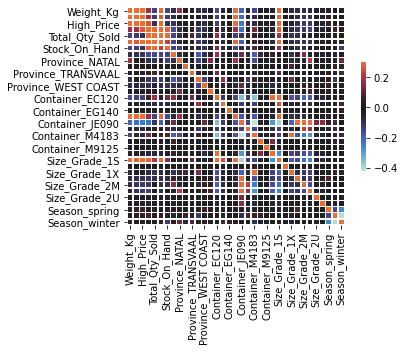

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = x_standardise_df.corr()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
